<a href="https://colab.research.google.com/github/MiguelAngelDLA/Notebooks_TallerIA_AD2024/blob/main/Redes_Neuronales_Dataset_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de Dígitos Escritos a Mano usando una Red Neuronal Básica (Dataset MNIST)
Este cuaderno de Colab demuestra cómo construir una red neuronal simple para reconocer dígitos escritos a mano utilizando el famoso conjunto de datos MNIST, empleando TensorFlow y Keras.

Seguiremos los siguientes pasos:
1. **Cargar el conjunto de datos MNIST**
2. **Preprocesar los datos**
3. **Construir la red neuronal**
4. **Entrenar el modelo**
5. **Evaluar el modelo en el conjunto de prueba**
6. **Hacer predicciones**


# Intuición de una Neurona Artificial

## ¿Qué es una Neurona Artificial?

Una **neurona artificial** es un modelo matemático inspirado en el funcionamiento de una neurona biológica. En términos simples, es una pequeña unidad de procesamiento que toma una serie de entradas (números), las transforma mediante operaciones matemáticas y luego genera una salida.

Una neurona artificial tiene tres componentes clave:

1. **Entradas (Input):** La neurona recibe información en forma de números. Estos números pueden representar características de un problema, como el brillo de un píxel en una imagen o el tamaño de un objeto.

2. **Pesos (Weights):** Cada entrada está asociada a un peso. Los pesos determinan la importancia de cada entrada. Por ejemplo, si una entrada es más relevante para la tarea, su peso será mayor.

3. **Función de Activación:** Después de procesar las entradas y los pesos, la neurona aplica una función de activación para producir una salida. Esta función decide si la neurona debe "activarse" (producir una salida significativa) o no.

## Intuición del Funcionamiento

Podemos imaginar la neurona como una simple "decisión matemática":

1. **Recibe señales:** Las entradas pueden ser una lista de características, como números.
   
2. **Calcula una combinación ponderada:** Multiplica cada entrada por su peso asociado y suma estos valores. Esto produce un valor total llamado **entrada neta** o **suma ponderada**.
   
   $
   \text{Entrada neta} = (entrada_1 \times w_1) + (entrada_2 \times w_2) + ... + (entrada_n \times w_n)
   $

3. **Aplica la función de activación:** Una vez que la neurona tiene la suma ponderada de las entradas, pasa este valor a través de una función de activación, como la función **ReLU** (Rectified Linear Unit) o **sigmoide**, que decide si la salida será alta o baja.
   
   $
   salida = f(\text{Entrada neta})
   $

4. **Produce una salida:** Dependiendo de la función de activación, la neurona puede "dispararse" (dar una salida alta) o permanecer inactiva (dar una salida baja).

## Ejemplo Visual:

Imagina que queremos predecir si un estudiante pasará un examen. Los factores que influencian esta decisión (entradas) podrían ser:

- **Horas de estudio** $(entrada_1)$
- **Horas de sueño**$(entrada_2)$

A cada factor le asignamos un peso. Por ejemplo, las **horas de estudio** podrían ser más importantes que las **horas de sueño**, por lo que el peso para las horas de estudio será mayor. La neurona sumará estas entradas ponderadas y aplicará una función de activación. Si el valor final supera un umbral, la neurona puede "decir" que el estudiante pasará el examen salida 1), de lo contrario, dirá que no lo hará (salida 0).

## ¿Por qué Necesitamos la Función de Activación?

La **función de activación** permite a la neurona tomar decisiones no lineales. Sin ella, la neurona simplemente sumaría valores y produciría una salida lineal. Sin embargo, muchos problemas reales son complejos y no pueden ser resueltos solo con combinaciones lineales de datos. Al introducir la función de activación, la neurona puede modelar relaciones más complejas.

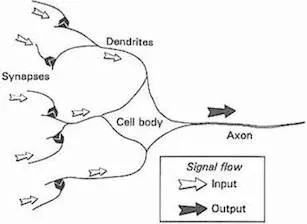

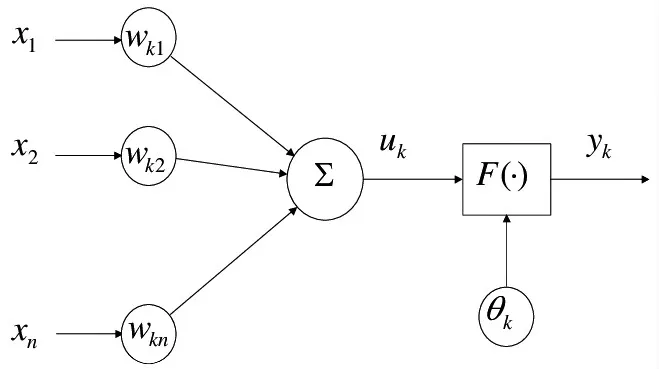

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

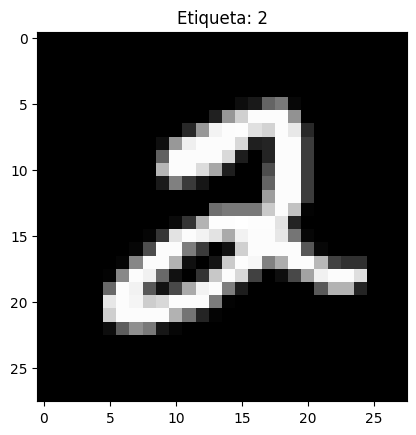

In [7]:
plt.imshow(x_train[5], cmap='gray')
plt.title(f'Etiqueta: {y_train[5]}')
plt.show()

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



# Funciones de Activación en TensorFlow y Keras

## 1. `relu` (Rectified Linear Unit)
```python
tf.keras.activations.relu(x)
```
- **Descripción**: La función `relu` es una de las más utilizadas en redes neuronales. Si el valor de entrada es positivo, se devuelve tal cual; si es negativo, se devuelve 0.
- **Fórmula**: `f(x) = max(0, x)`
- **Uso común**: Capas ocultas de redes neuronales.

---

## 2. `sigmoid` (Logistic Sigmoid)
```python
tf.keras.activations.sigmoid(x)
```
- **Descripción**: La función `sigmoid` convierte las entradas en valores entre 0 y 1, utilizando la fórmula sigmoide. Ideal para problemas de clasificación binaria.
- **Fórmula**: `f(x) = 1 / (1 + exp(-x))`
- **Uso común**: Clasificación binaria, capas de salida para problemas de probabilidad binaria.

---

## 3. `tanh` (Tangente Hiperbólica)
```python
tf.keras.activations.tanh(x)
```
- **Descripción**: La función `tanh` convierte las entradas en valores entre -1 y 1. Se utiliza frecuentemente cuando se desea centrar las salidas.
- **Fórmula**: `f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))`
- **Uso común**: Capas ocultas de redes neuronales, especialmente para redes recurrentes.

---

## 4. `softmax`
```python
tf.keras.activations.softmax(x, axis=-1)
```
- **Descripción**: Convierte un vector de valores en una distribución de probabilidad, donde la suma de todas las probabilidades es 1. Se utiliza principalmente en problemas de clasificación multiclase.
- **Fórmula**: `f(x)_i = exp(x_i) / sum(exp(x_j))`
- **Uso común**: Capas de salida en problemas de clasificación multiclase.

---

## 5. `softplus`
```python
tf.keras.activations.softplus(x)
```
- **Descripción**: Es una versión suave de `relu` que nunca llega a cero, sino que se acerca asintóticamente.
- **Fórmula**: `f(x) = log(1 + exp(x))`
- **Uso común**: Alternativa a `relu` cuando se necesita una transición más suave.

---

## 6. `softsign`
```python
tf.keras.activations.softsign(x)
```
- **Descripción**: Función similar a `tanh`, pero más suave en los extremos. Se aproxima a -1 y 1 para valores grandes.
- **Fórmula**: `f(x) = x / (1 + |x|)`
- **Uso común**: Redes neuronales profundas, como alternativa a `tanh`.

---

## 7. `elu` (Exponential Linear Unit)
```python
tf.keras.activations.elu(x, alpha=1.0)
```
- **Descripción**: Similar a `relu`, pero permite valores negativos exponenciales para entradas menores a 0, lo que puede mejorar el aprendizaje en algunos casos.
- **Fórmula**: `f(x) = x` si `x > 0`, y `alpha * (exp(x) - 1)` si `x <= 0`
- **Uso común**: Redes neuronales profundas como alternativa a `relu`.

---

## 8. `selu` (Scaled Exponential Linear Unit)
```python
tf.keras.activations.selu(x)
```
- **Descripción**: Una versión escalada de `elu` que automáticamente normaliza las salidas de las capas intermedias hacia la media y la varianza correctas.
- **Fórmula**: `f(x) = scale * elu(x)`
- **Uso común**: Redes neuronales con muchas capas, donde la autorregulación de las salidas es importante.

---

## 9. `gelu` (Gaussian Error Linear Unit)
```python
tf.keras.activations.gelu(x)
```
- **Descripción**: Una función de activación que combina características de `relu` y `sigmoid`. Suaviza los valores en una curva gaussiana.
- **Fórmula**: `f(x) = x * P(X <= x)` (P es la función de distribución acumulada de la gaussiana estándar)
- **Uso común**: Redes neuronales de última generación, como BERT y Transformadores.

---

## 10. `linear`
```python
tf.keras.activations.linear(x)
```
- **Descripción**: No aplica ninguna transformación, devuelve las entradas tal como son. Se usa en capas de salida cuando no se necesita ninguna activación (como en regresión).
- **Fórmula**: `f(x) = x`
- **Uso común**: Capas de salida en problemas de regresión.

---


In [10]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8667 - loss: 0.4649 - val_accuracy: 0.9542 - val_loss: 0.1590
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9652 - loss: 0.1163 - val_accuracy: 0.9643 - val_loss: 0.1172
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9758 - loss: 0.0752 - val_accuracy: 0.9694 - val_loss: 0.0987
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0570 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9714 - val_loss: 0.0973


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1072
Precisión en el conjunto de prueba: 0.9761000275611877


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción: 7


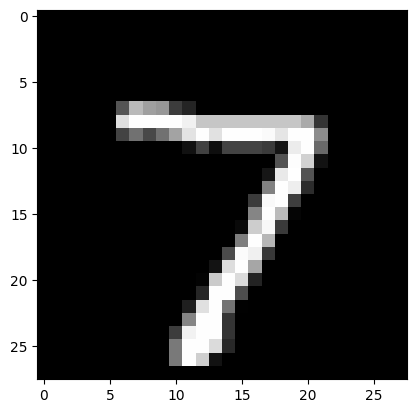

In [12]:
predictions = model.predict(x_test)

import numpy as np
print(f'Predicción: {np.argmax(predictions[0])}')
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()
